##퀀토 옵션(Quanto Option)
퀀토 옵션(Quanto Option)은 기초 자산의 가격이 한 통화로 표시되지만, 옵션의 페이오프가 다른 통화로 계산되는 옵션입니다. 이는 환율 변동에 따른 리스크를 제거하거나 최소화하려는 투자자에게 유용합니다.

In [13]:
import matplotlib.font_manager as fm

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


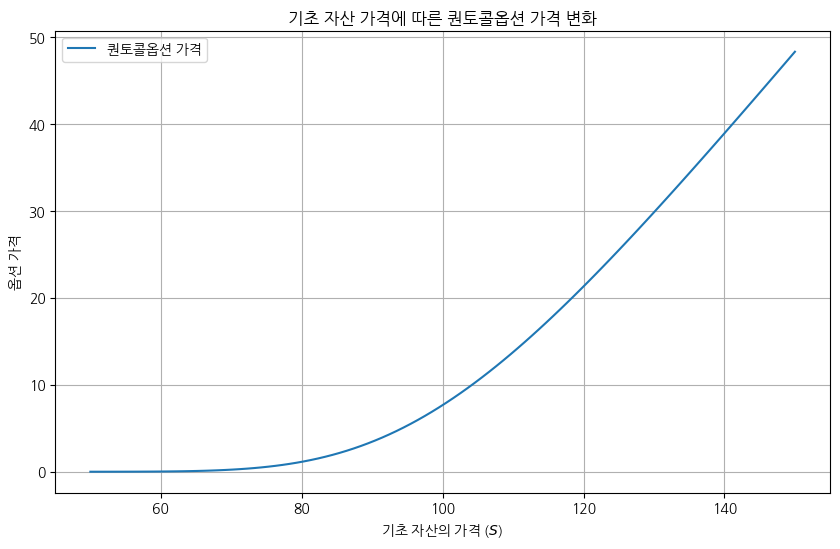

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 블랙-숄즈 모델을 활용한 퀀토콜옵션 가격 계산 함수
def quanto_call_option_price(S, K, T, r, rf, sigma, q, rho):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    sigma_q = np.sqrt(sigma ** 2 + rf ** 2 - 2 * rho * sigma * rf)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    call_price_quanto = call_price * np.exp((r - rf) * T - 0.5 * sigma_q ** 2 * T)
    return call_price_quanto

# 예시 데이터
S_values = np.linspace(50, 150, 100)  # 기초 자산의 가격 범위
K = 100  # 옵션 행사가격
T = 1    # 만기 기간 (1년)
r = 0.01 # 일본의 무위험 이자율 (1%)
rf = 0.02# 미국의 무위험 이자율 (2%)
sigma = 0.2  # 기초 자산의 변동성 (20%)
q = 0.01 # 배당 수익률 (1%)
rho = 0.5  # 기초 자산과 환율 간의 상관계수 (0.5)

# 퀀토콜옵션의 가격 계산
quanto_call_prices = [quanto_call_option_price(S, K, T, r, rf, sigma, q, rho) for S in S_values]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(S_values, quanto_call_prices, label='퀀토콜옵션 가격')
plt.xlabel('기초 자산의 가격 ($S$)')
plt.ylabel('옵션 가격')
plt.title('기초 자산 가격에 따른 퀀토콜옵션 가격 변화')
plt.legend()
plt.grid(True)
plt.show()


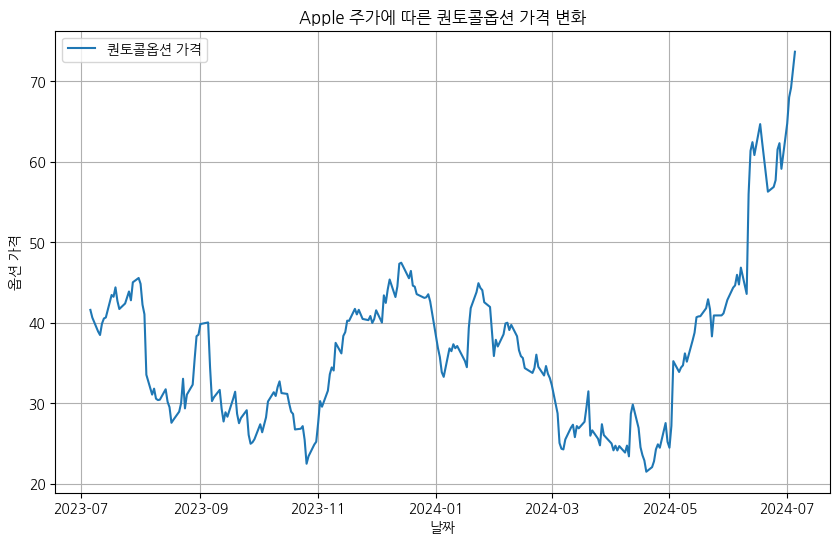

In [15]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 블랙-숄즈 모델을 활용한 퀀토콜옵션 가격 계산 함수
def quanto_call_option_price(S, K, T, r, rf, sigma, q, rho):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    sigma_q = np.sqrt(sigma ** 2 + rf ** 2 - 2 * rho * sigma * rf)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    call_price_quanto = call_price * np.exp((r - rf) * T - 0.5 * sigma_q ** 2 * T)
    return call_price_quanto

# 실제 데이터 가져오기
# Apple Inc. 주가 데이터
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
S_values = apple_data['Close'].values

# USD/JPY 환율 데이터
usd_jpy = yf.Ticker("JPY=X")
usd_jpy_data = usd_jpy.history(period="1y")
exchange_rates = usd_jpy_data['Close'].values

# 기본 변수 설정
K = 150  # 옵션 행사가격
T = 1    # 만기 기간 (1년)
r = 0.01 # 일본의 무위험 이자율 (1%)
rf = 0.02# 미국의 무위험 이자율 (2%)
sigma = np.std(np.log(apple_data['Close'] / apple_data['Close'].shift(1)).dropna()) * np.sqrt(252)  # 기초 자산의 변동성
q = 0.01 # 배당 수익률 (1%)
rho = 0.5  # 기초 자산과 환율 간의 상관계수 (0.5)

# 퀀토콜옵션의 가격 계산
quanto_call_prices = [quanto_call_option_price(S, K, T, r, rf, sigma, q, rho) for S in S_values]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(apple_data.index, quanto_call_prices, label='퀀토콜옵션 가격')
plt.xlabel('날짜')
plt.ylabel('옵션 가격')
plt.title('Apple 주가에 따른 퀀토콜옵션 가격 변화')
plt.legend()
plt.grid(True)
plt.show()
